In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('Pleiades_Star_Cluster.jpg')

In [3]:
img.shape

(532, 800, 3)

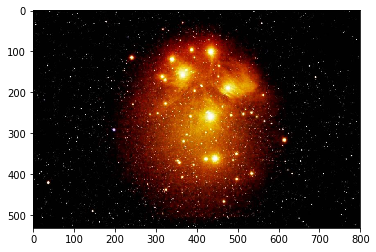

In [4]:
plt.imshow(img)
plt.show()

In [5]:
color = ('b','g','r')
list(enumerate(color))

[(0, 'b'), (1, 'g'), (2, 'r')]

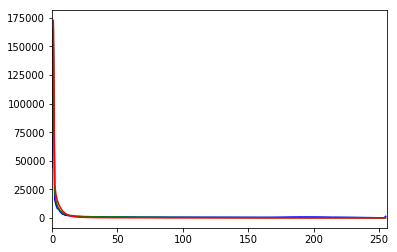

In [6]:
for i, col in enumerate(color):
    histogram = cv2.calcHist([img], # Image
                            [i], # Index of channel
                            None, # No mask
                            [256], # Histogram size
                            [0,256]) # Range
    plt.plot(histogram,color = col)
plt.xlim([0,256])
plt.show()

In [7]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [8]:
gray_image.shape

(532, 800)

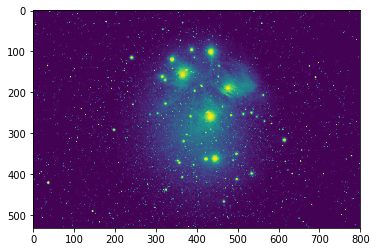

In [9]:
plt.imshow(gray_image)
plt.show()

Template Matching is a method for searching and finding the location of a template image in a larger image. It simply slides the template image over the input image (as in 2D convolution). It returns a grayscale image, where each pixel denotes how much does the neighbourhood of that pixel match with template.

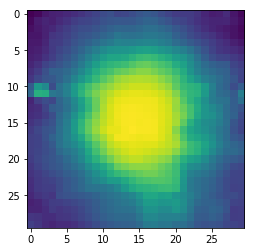

In [10]:
template = gray_image[87:117,420:450]
plt.imshow(template)
plt.show()

In [11]:
template.shape

(30, 30)

In [12]:
w,h = template.shape

In [13]:
result = cv2.matchTemplate(gray_image, template, cv2.TM_CCOEFF_NORMED)
#cv2.TM_CCOEFF_NORMED: Normalized convolution

In [14]:
result.shape

(503, 771)

In [15]:
threshold = 0.48

In [16]:
loc = np.where(result>threshold) #2d list 

In [17]:
conv_val = result[loc] #convolution values larger than threshold

In [18]:
boxes = []
for x,y in zip(*loc): #::-1 to swap x and y
    boxes.append([y,x,y+w,x+h])

In [19]:
groupedBoxes = cv2.groupRectangles(boxes,1,0.03)
groupedBoxes[0]

array([[373,  81, 403, 111],
       [420,  86, 450, 116],
       [226, 101, 256, 131],
       [325, 105, 355, 135],
       [350, 139, 380, 169],
       [303, 150, 333, 180],
       [399, 168, 429, 198],
       [506, 167, 536, 197],
       [462, 175, 492, 205],
       [378, 181, 408, 211],
       [309, 213, 339, 243],
       [417, 243, 447, 273],
       [500, 236, 530, 266],
       [371, 245, 401, 275],
       [599, 302, 629, 332],
       [353, 307, 383, 337],
       [482, 334, 512, 364],
       [430, 347, 460, 377],
       [407, 348, 437, 378],
       [341, 355, 371, 385],
       [520, 384, 550, 414],
       [483, 397, 513, 427]], dtype=int32)

In [20]:
for x1,y1,x2,y2 in groupedBoxes[0]:
    cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),2)
    text = "%.2f"%result[y1,x1] #convolution values
    cv2.putText(img, text, (x1,y1-10),0,0.70,(255,0,0),2)

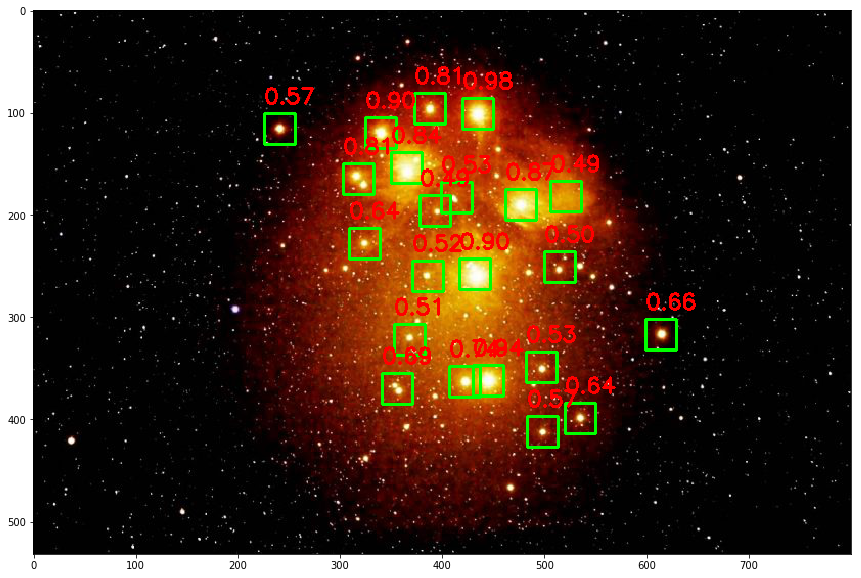

In [21]:
plt.figure(figsize=(20,10))
plt.imshow(img)
plt.show()

In [22]:
cv2.imwrite('detected_objects.jpg', img, params=None)

True

In [23]:
i=1
for x1,y1,x2,y2 in groupedBoxes[0]:
    cv2.imwrite('detected_objects/object_%d.jpg'%i, gray_image[y1:y2,x1:x2], params=None)
    i+=1